# Lista de Exercício 6
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [1]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/hill.tif", "hill.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/hiIzt.png", "car.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/parede.tif", "parede.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")



### Introdução:

Nesta lista de exercícios vamos estudar sobre alguns filtros que podem ser aplicados no domínio da frequência visando melhorar a qualidade das imagens. Lembre-se que o sistemas de coordenadas no domínio da frequência é um pouco diferente:

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/ExemploCoordenadas.png" ></center>

<center><caption><b>Figura 1:</b> Sistemas de coordenadas no domínio original da imagem (esquerda) e domínio de Fourie (direita).</b></caption></center>


 Primeiramente, vamos importar as bibliotecas que iremos utilizar:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### 1) Filtro notch reject (Nota: 3,0):

Em qual situação devo utilizar um filtro notch? Filtros notch são frequentemente utilizados para rastrear e retirar componentes senoidais de sinais. Nas imagens isto não é diferente. 

Filtragem notch reject é usada para eliminar efeitos de ruídos periódicos. Estes filtros são capazes de rejeitar regiões específicas em torno de uma
frequência pré-definida, assim, sua utilização é recomendada quando o sinal a ser atenuado é bem definido.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/ExemploFiltroNotch2.png" width="380" height="380"></center>

<center><caption><b> Figura 2:</b> Exemplo de filtragem com Notch em ruído periódico.</b></caption></center>
<caption><center> </center></caption>

**Exercício:**

Nesta etapa, vamos trabalhar com a imagem ```car.png```. Considere que a imagem foi digitalizada com resolução de 400 DPI. 

1. Carregue o arquivo de imagem ```car.png``` e mostre-a.
2. Passe esta imagem para o domínio da frequência (Espectro de Fourier) utilizando as funções ```np.fft.fft2``` e ```np.fft.fftshift``` (**Lembre-se do padding.**). Em seguida, mostre a magnitude do espectro.
3. Para visualizar e compreender melhor, vamos dar um "zoom" na imagem no domínio da frequência. Selecione a região ```[0:800,200:360]``` e mostre o resultado desse corte. Comente o que são os "pontos brancos mais evidentes" no espectro.
4.  Faça um filtro do tipo notch reject butterworth de ordem ```ord = 4``` com raio ```D0 = 8``` para remover o ruído da seguinte forma:
 *   4 pontos mais próximos do centro do espectro
     *   Encontre o centro dos "pontos brancos" mais próximo ao centro do espectro (pode ser de forma empírica/visual)
     *   Crie o filtro com base no centro desses 4 pontos encontrados
 *   8 pontos mais próximos do centro do espectro
     *   Encontre o centro dos "pontos brancos" mais próximo ao centro do espectro (pode ser de forma empírica/visual)
     *   Crie o filtro com base no centro desses 8 pontos encontrados

 Os centros do filtro devem coincidir com o centro dos pontos encontrados no 
espectro da frequência.

5. Para cada situação, moste a magnitude do filtro criado. Após aplicação do filtro construído, mostre, também, a magnitude do espectro de Fourier resultante, bem como a imagem filtrada, agora, em seu domínio original.
6. Comente os resultados


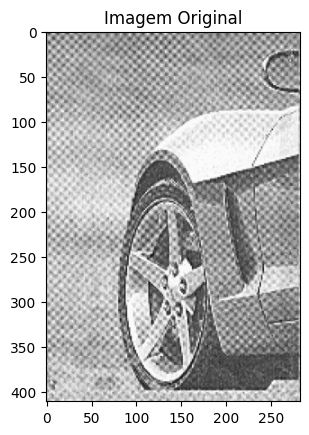

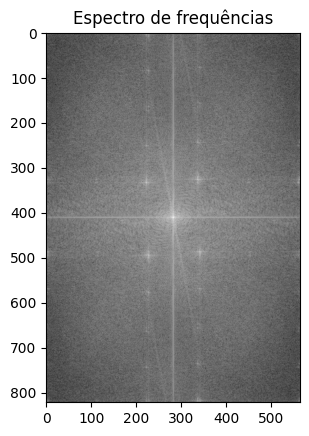

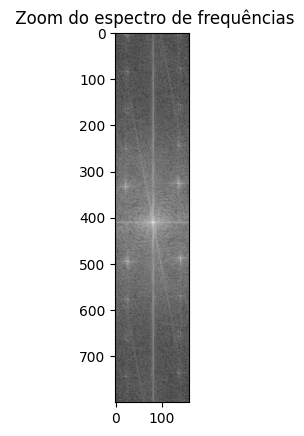

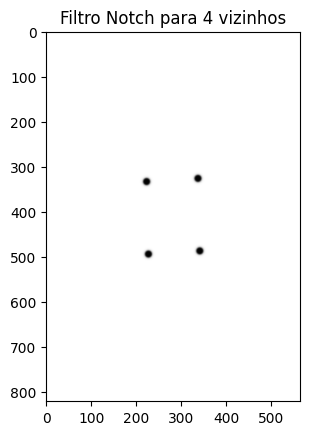

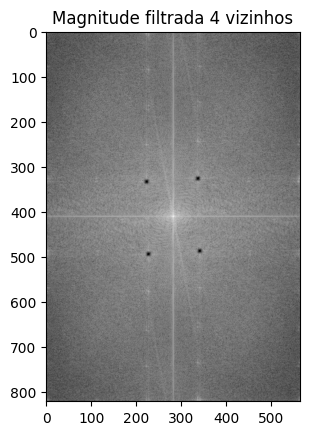

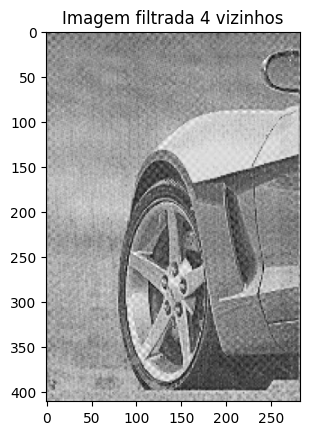

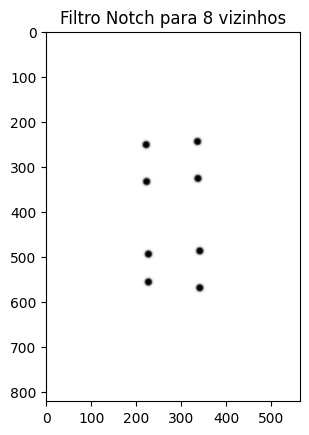

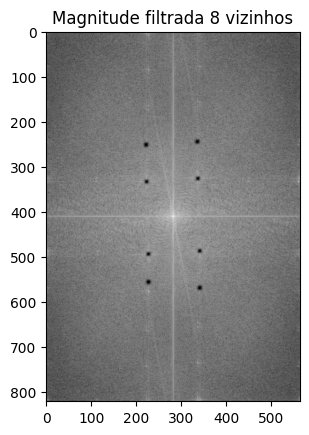

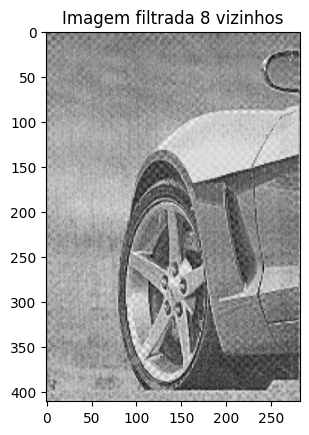

In [20]:
## -- Seu código começa AQUI -- ##
# Carregando e mostrando a imagem
img1 = cv.imread('car.png', cv.IMREAD_GRAYSCALE)

plt.title('Imagem Original')
plt.imshow(img1, cmap='gray')
plt.show()

# Passando a imagem para o domínio da frequência
M, N = img1.shape

Mf = 2*M
Nf = 2*N

f1 = np.fft.fftshift(np.fft.fft2(img1, s = (Mf,Nf)))
f1_mag = 20*np.log(abs(f1) + 1)

# Mostrando a magnitude do espectro
plt.title('Espectro de frequências')
plt.imshow(f1_mag, cmap='gray')
plt.show()

# Mostrando o zoom do espectro de magnitudes
zoom = f1_mag[0:800, 200:360]
plt.title(' Zoom do espectro de frequências')
plt.imshow(zoom, cmap='gray')
plt.show()

# Filtro Notch para os 4 pontos mais próximos:

# Para encontrar os 4 pontos brilhantes mais próximos, faremos uma busca em uma região próxima
#  pelos pontos mais brilhantes
bright_list = []
search_zone = zoom[300:500,:]
a, b = search_zone.shape

for i in range(a):
    for j in range(b):
        # É preciso excluir os pontos que estão próximos do centro, já que eles são brilhantes, mas
        # não estão relacionados com as ondulações indesejadas
        if i < 50 or i > 150:
            if j < 50 or j > 125:

                # Checamos se o valor do pixel é maior que qualquer valor na lista dos mais brilhantes
                z = search_zone[i,j]
                if (z > search_zone).any():
                    bright_list.append((z,i+300,j+200))

#Agora pegamos apenas os 4 pontos mais brilhantes
bright_list.sort(reverse=True)
bright_list = bright_list[0:4]

# Criando o filtro Notch
n = 4
D0 = 8
notch4 = []

for item in bright_list:
    cx = item[1]
    cy = item[2]
    notch = np.ones((2*M, 2*N))

    for x in range(2*M):
        for y in range(2*N):
            dist = np.sqrt((x-cx)**2 + (y-cy)**2)
            notch[x,y] = 1 - 1/((1+np.power(dist/D0, 2*n)))

    notch4.append(notch)


notch4 = notch4[0]*notch4[1]*notch4[2]*notch4[3]

# Mostrando a magnitude do filtro
plt.title('Filtro Notch para 4 vizinhos')
plt.imshow(notch4, cmap='gray')
plt.show()

# Aplicando o filtro e mostrando a magnitude resultante
f1_notch4 = notch4*f1
mag_f1_notch4 = 20*np.log(np.abs(f1_notch4)+1)

plt.title('Magnitude filtrada 4 vizinhos')
plt.imshow(mag_f1_notch4, cmap='gray')
plt.show()

# Retornando a imagem para o domínio do espaço e mostrando
img1_notch4 = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_notch4)))
img1_notch4 = img1_notch4[0:M,0:N]

plt.title('Imagem filtrada 4 vizinhos')
plt.imshow(img1_notch4, cmap='gray')
plt.show()

# Filtro Notch para os 8 pontos mais próximos:

bright_list.extend([(0,245,336),(0,252,222),(0,557,227),(0,570,341)])

# Criando o filtro Notch
n = 4
D0 = 8
notch8 = []

for item in bright_list:
    cx = item[1]
    cy = item[2]
    notch = np.ones((2*M, 2*N))

    for x in range(2*M):
        for y in range(2*N):
            dist = np.sqrt((x-cx)**2 + (y-cy)**2)
            notch[x,y] = 1 - 1/((1+np.power(dist/D0, 2*n)))

    notch8.append(notch)


notch8 = notch8[0]*notch8[1]*notch8[2]*notch8[3]*notch8[4]*notch8[5]*notch8[6]*notch8[7]

# Mostrando a magnitude do filtro
plt.title('Filtro Notch para 8 vizinhos')
plt.imshow(notch8, cmap='gray')
plt.show()

# Aplicando o filtro e mostrando a magnitude resultante
f1_notch8 = notch8*f1
mag_f1_notch8 = 20*np.log(np.abs(f1_notch8)+1)

plt.title('Magnitude filtrada 8 vizinhos')
plt.imshow(mag_f1_notch8, cmap='gray')
plt.show()

# Retornando a imagem para o domínio do espaço e mostrando
img1_notch8 = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_notch8)))
img1_notch8 = img1_notch8[0:M,0:N]

plt.title('Imagem filtrada 8 vizinhos')
plt.imshow(img1_notch8, cmap='gray')
plt.show()


## -- Seu código termina AQUI -- ##

## Comentários:
# Os pontos brancos representam oscilasções indesejadas na imagem.
# Para 4 vizinhos, uma parte das frequências foi removida e para o vizinhos, o resultado é um pouco melhor.

### 2) Realce (Nota: 3,0):

Nesta parte da lista iremos trabalhar com o filtro de realce. Para isso, utilizaremos a imagem ```parede.tif```. Considere que a imagem foi digitalizada com resolução de 500 DPI.
Dica: Como este filtro realça principamente os detalhes, é interessante analisar as imagens sempre com ZOOM!

1. Carregue a imagem “parede.tif” e mostre-a.
2. Visualizar a imagem no domínio da frequência (Espectro de Fourier). **Lembre-se do padding.**
4. Criar um filtro de realce (30%), utilizando passa-alta do tipo “Butterworth” (n = 2), com frequência de corte 3,0 ciclos/mm. Aplicar na imagem e verificar o resultado.
5. Criar um filtro do tipo "Gaussiano", no domínio da frequência, que realce em 40% todas as frequências entre 2,0 e 4,0 ciclos/mm. Aplicar na imagem e verificar o resultado no domínio do espaço.



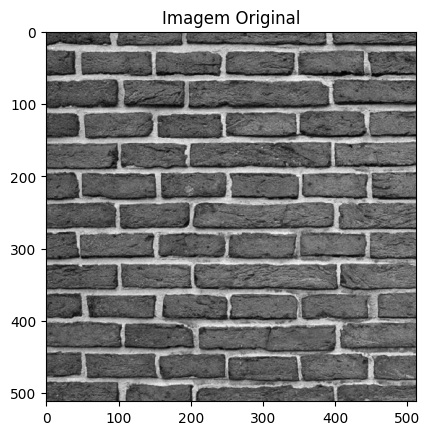

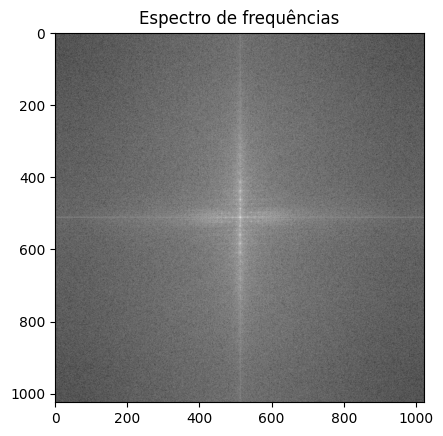

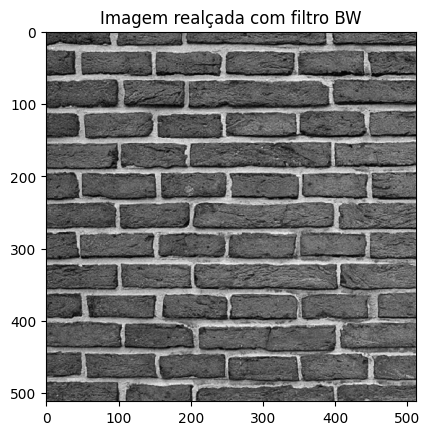

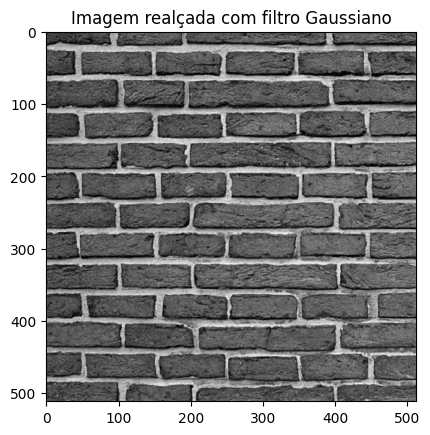

In [25]:
## -- Seu código começa AQUI -- ##
# Carregando e mostrando a imagem
img2 = cv.imread('parede.tif', cv.IMREAD_UNCHANGED)

plt.title('Imagem Original')
plt.imshow(img2, cmap='gray')
plt.show()

# Passando a imagem para o domínio da frequência
M, N = img2.shape

Mf = 2*M
Nf = 2*N
cx = M
cy = N

f2 = np.fft.fftshift(np.fft.fft2(img2, s = (Mf,Nf)))
f2_mag = 20*np.log(abs(f2) + 1)

# Mostrando a magnitude do espectro
plt.title('Espectro de frequências')
plt.imshow(f2_mag, cmap='gray')
plt.show()

############################################################################
#Filtro BW

# Calculando D0
DPI = 500
CPM = 3

delta_x = 25.4/DPI
delta_u = 1/(2*M*delta_x)
D0 = CPM/delta_u

# Criando o filtro Butterworth
bw_lp = np.zeros((2*M, 2*N))
n = 2

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-cx)**2 + (y-cy)**2)
        bw_lp[x,y] = 1/(1+np.power(dist/D0, 2*n))

bw_hp = 1 - bw_lp
bw_realce = 0.3*bw_hp + 1

#Aplicando o filtro
f2_bw_realce = bw_realce*f2

# Retornando a imagem para o domínio do espaço e mostrando a imagem
img2_bw_realce = np.abs(np.fft.ifft2(np.fft.ifftshift(f2_bw_realce)))
img2_bw_realce = img2_bw_realce[0:M,0:N]

plt.title('Imagem realçada com filtro BW')
plt.imshow(img2_bw_realce, cmap='gray')
plt.show()


############################################################################
# FIltro Gaussiano
# Calculando D0
DPI = 500
CPM1 = 2
CPM2 = 4

delta_x = 25.4/DPI
delta_u = 1/(2*M*delta_x)
D1 = CPM1/delta_u
D2 = CPM2/delta_u

# Criando o filtro
gauss1 = np.zeros((2*M, 2*N))
gauss2 = np.zeros((2*M, 2*N))

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-cx)**2 + (y-cy)**2)
        if dist == 0:
            dist = 0.01
        
        gauss1[x,y] = 1 - np.exp(-((dist**2)/(2*D1**2)))
        gauss2[x,y] = np.exp(-((dist**2)/(2*D2**2)))

gauss = gauss1*gauss2
gauss_realce = 0.4*gauss + 1

#Aplicando o filtro
f2_gauss_realce = gauss_realce*f2

# Retornando a imagem para o domínio do espaço e mostrando a imagem
img2_gauss_realce = np.abs(np.fft.ifft2(np.fft.ifftshift(f2_gauss_realce)))
img2_gauss_realce = img2_gauss_realce[0:M,0:N]

plt.title('Imagem realçada com filtro Gaussiano')
plt.imshow(img2_gauss_realce, cmap='gray')
plt.show()
## -- Seu código termina AQUI -- ##

### 3) Filtragem Homomórfica (Nota: 4,0)

Agora vamos trabalhar o realce corrigindo uma imagem com iluminação não uniforme. Para isso, vamos trabalhar com a figura "***hill.tif***". Considere que essa imagem foi digitalizada com resolução de 300 DPI.

1. Carregue o arquivo de imagem ```hill.tif``` e mostre-a.
2. Aplique uma correção Logarítmica à imagem original a fim de fazer uma correção de contraste. *Dica: após essa correção, converta a imagem_Log para float32*.
3. Construa padding simétrico (espelhamento) para eliminar o efeito de *wrap around*. Para fazer isso, utilize a função ```np.pad```.
4. Agora, vamos passar a imagem com *padding* para o domínio da frequência e visualizar o espectro de frequências.
5. Em seguida, crie um filtro do tipo homomórfico, com ```γL = 0,5``` e ```γH = 1,5```, com variação Gaussiana e com frequência de corte de 2,0 ciclos/mm e aplique na imagem. Mostre o filtro construido.
6. Aplique o filtro homomórfico criado sobre a imagem no domínio da frequência.
7. Aplique a transformada inversa para retornar a imagem ao domínio original.
8. Aplique uma correção exponencial (```np.exp```) para corrigir a transformação logarítmica no início. Por fim, faça um alargamento de contraste sobre a imagem filtrada no domínio original e mostre-a.
9. Comentar os resultados encontrados após aplicação dos filtros.




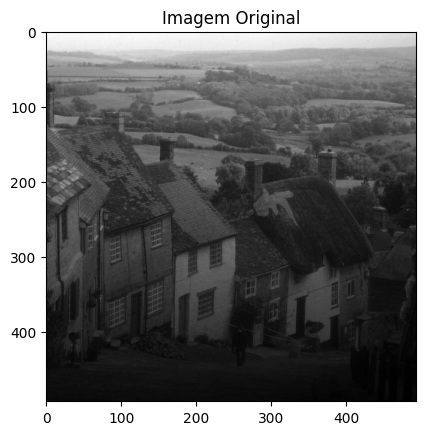

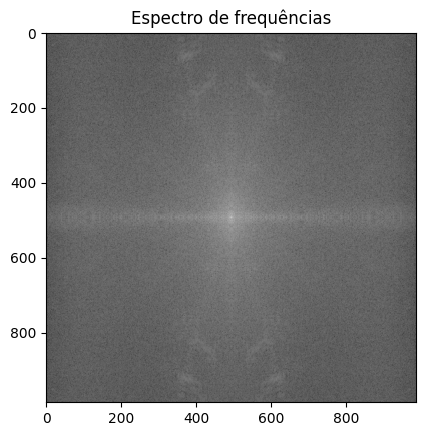

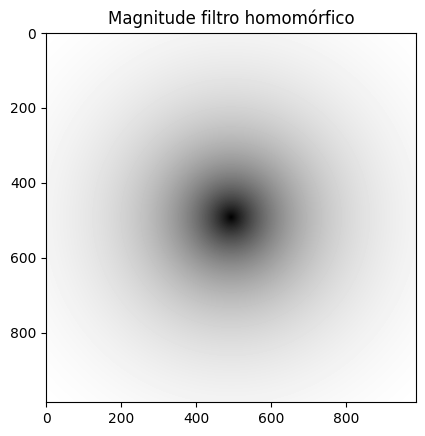

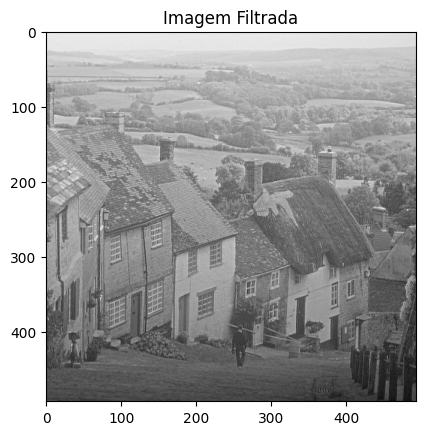

In [27]:
## -- Seu código começa AQUI -- ##
# Carregando e mostrando a imagem
img3 = cv.imread('hill.tif', cv.IMREAD_UNCHANGED)

plt.title('Imagem Original')
plt.imshow(img3, cmap='gray')
plt.show()

c1 = 255/(np.log10(img3.max()+1))
img3 = (c1*np.log10(img3.astype(np.uint8) + 1.00001)).astype(np.float32)

# Fazendo o padding
M, N = img3.shape

Mf = 2*M
Nf = 2*N
cx = M
cy = N

img3 = np.pad(img3, ((0,M),(0,N)), mode='symmetric')

# Passando a imagem para o domínio da frequência

f3 = np.fft.fftshift(np.fft.fft2(img3))
f3_mag = 20*np.log(abs(f3) + 1)

# Mostrando a magnitude do espectro
plt.title('Espectro de frequências')
plt.imshow(f3_mag, cmap='gray')
plt.show()

# Calculando D0
DPI = 500
CPM = 2

delta_x = 25.4/DPI
delta_u = 1/(2*M*delta_x)
D0 = CPM/delta_u

# Implementando o filtro gaussiano
gauss_lp = np.zeros((2*M, 2*N))

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-cx)**2 + (y-cy)**2)
        gauss_lp[x,y] = np.exp(-dist/(2*D0))

gauss_hp = 1 - gauss_lp

# Implementando o filtro homomórfico
gamma_L = 0.5
gamma_H = 1.5

H = (gamma_H - gamma_L)*gauss_hp + gamma_L
H_mag = 20*np.log(np.abs(H)+1)


# Mostrando o espectro de frequências
plt.title('Magnitude filtro homomórfico')
plt.imshow(H_mag, cmap='gray')
plt.show()

# Aplicando o filtro
f3_H = H*f3

#Realizando a transformada inversa
img3_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(f3_H)))
img3_filtered = img3_filtered[0:M,0:N]

# Correção exponencial e alargamento de contraste
img3_filtered = np.exp(img3_filtered/c1)

img3_filtered = 255/(img3_filtered.max()-img3_filtered.min())*(img3_filtered-img3_filtered.min())
# Mostrando a imagem final
plt.title('Imagem Filtrada')
plt.imshow(img3_filtered, cmap='gray', vmax=255, vmin=0)
plt.show()

## -- Seu código termina AQUI -- ##

## Comentários:
# A imagem, depois da transformação homomórfica, ficou com a iluminação corrigida,
# sendo possível ver melhor os detalhes e com iluminação mais homogênea